# AI Impact on Jobs by 2030: Who Survives the Automation Wave?

Artificial Intelligence is no longer a distant concept it is actively transforming industries, redefining workflows, and reshaping the global labor market. As we approach 2030, a critical question emerges:

**Which jobs are most vulnerable to automation and which will remain resilient?**

This project analyzes 3,000 simulated job profiles characterized by salary, experience, AI exposure, technological growth potential, and automation probability.

The objective of this analysis is to:

1. Examine how automation risk is distributed across the workforce  
2. Investigate whether salary or experience provides protection  
3. Analyze the relationship between technological growth and vulnerability  
4. Develop a composite Future Stability Score to identify resilient profiles  

Rather than focusing only on risk, this project evaluates long-term career viability in an AI-driven economy.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/AI_Impact_on_Jobs_2030.csv")


## Dataset Overview

The dataset contains 3,000 job profiles with the following attributes:

- Average_Salary  
- Years_Experience  
- AI_Exposure_Index  
- Tech_Growth_Factor  
- Automation_Probability_2030  
- 10 Skill Intensity Indicators  

Automation_Probability_2030 represents the predicted likelihood that a role could be automated by the year 2030.


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## The Automation Shock

What portion of the workforce is at serious risk?

To better understand workforce vulnerability, jobs are categorized into:

- Low Risk (<30%)
- Medium Risk (30–60%)
- High Risk (>60%)


In [4]:
df["Risk_Category"] = pd.cut(
    df["Automation_Probability_2030"],
    bins=[0, 0.3, 0.6, 1],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

risk_percent = df["Risk_Category"].value_counts(normalize=True) * 100
risk_percent

Risk_Category
Medium Risk    39.566667
High Risk      35.800000
Low Risk       24.633333
Name: proportion, dtype: float64

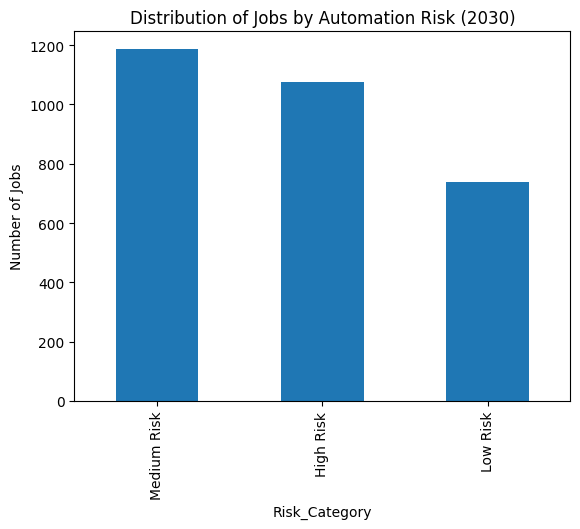

In [5]:
df["Risk_Category"].value_counts().plot(kind="bar")
plt.title("Distribution of Jobs by Automation Risk (2030)")
plt.ylabel("Number of Jobs")
plt.show()


In [12]:
high_risk_percentage = (
    (df["Automation_Probability_2030"] > 0.6).mean() * 100
).round(1)

high_risk_percentage


np.float64(35.8)

## 🚨 The Automation Shock

**{high_risk_percentage}% of job profiles face automation probabilities above 60% by 2030.**

This suggests that automation risk is not marginal — it is widespread.


## Does Salary Protect Against Automation?

A common assumption is that higher-paying jobs are safer from automation. This section evaluates whether salary levels differ significantly across risk categories.


In [7]:
salary_comparison = df.groupby("Risk_Category")["Average_Salary"].mean()
salary_comparison


C:\Users\owner\AppData\Local\Temp\ipykernel_26124\398192827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_comparison = df.groupby("Risk_Category")["Average_Salary"].mean()


Risk_Category
Low Risk       89166.776725
Medium Risk    90607.644482
High Risk      88148.337989
Name: Average_Salary, dtype: float64

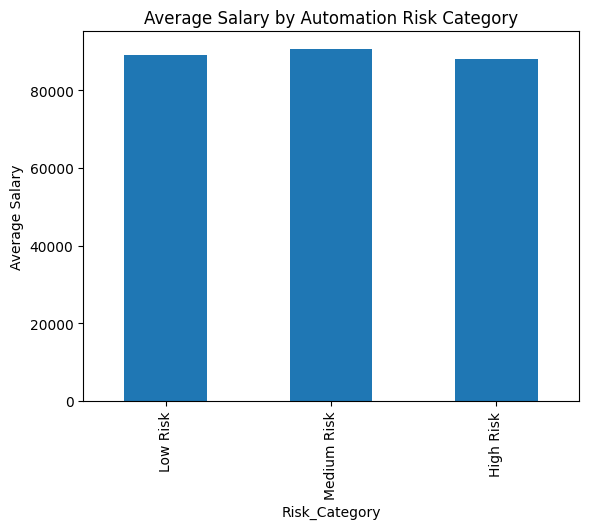

In [8]:
salary_comparison.plot(kind="bar")
plt.title("Average Salary by Automation Risk Category")
plt.ylabel("Average Salary")
plt.show()


### Insight

The differences in average salary across risk categories are minimal, suggesting that higher income does not guarantee protection from automation. Automation risk appears to cut across income brackets.


## Does Experience Reduce Automation Risk?

Experience is often seen as a protective factor. This analysis evaluates whether years of experience correlate with lower automation probability.


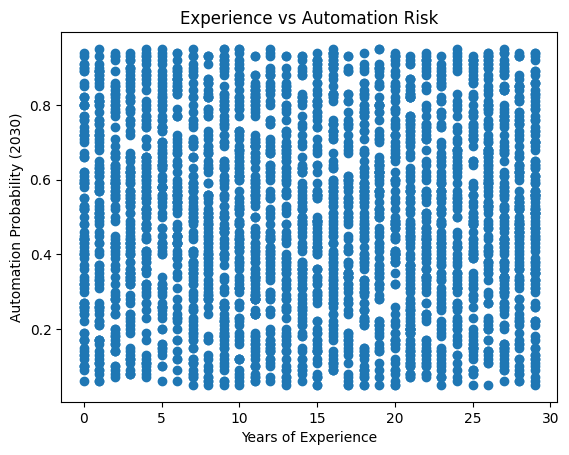

In [9]:
plt.scatter(df["Years_Experience"], df["Automation_Probability_2030"])
plt.xlabel("Years of Experience")
plt.ylabel("Automation Probability (2030)")
plt.title("Experience vs Automation Risk")
plt.show()


### Insight

No clear trend is observed between experience and automation risk. Both early-career and senior professionals face comparable levels of vulnerability.


## Technological Growth vs Automation Risk

While automation represents risk, technological growth may signal opportunity. This section explores the relationship between growth potential and vulnerability.


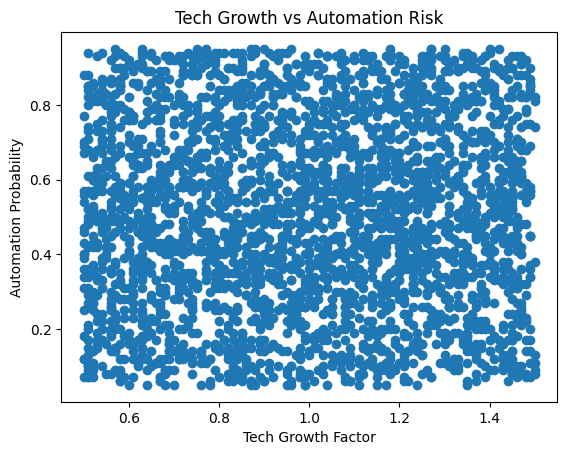

In [10]:
plt.scatter(df["Tech_Growth_Factor"], df["Automation_Probability_2030"])
plt.xlabel("Tech Growth Factor")
plt.ylabel("Automation Probability")
plt.title("Tech Growth vs Automation Risk")
plt.show()


## Future Stability Score

To move beyond risk alone, a composite index is created combining:

- Low automation probability
- High technological growth potential

This score estimates long-term career resilience.


In [11]:
df["Future_Stability_Score"] = (
    (1 - df["Automation_Probability_2030"]) * 0.6 +
    df["Tech_Growth_Factor"] * 0.4
)

df.sort_values("Future_Stability_Score", ascending=False).head(10)


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Future_Stability_Score
1561,Teacher,104713,13,High School,0.70,1.49,0.07,Low Risk,0.43,0.24,0.63,0.81,0.97,0.45,0.79,0.92,0.68,0.24,1.154
1936,Nurse,95478,22,High School,0.60,1.50,0.08,Low Risk,0.42,0.78,0.03,0.69,0.08,0.24,0.16,0.91,0.18,0.04,1.152
1415,Nurse,106831,23,Master's,0.32,1.48,0.07,Low Risk,0.26,0.09,0.27,0.09,0.51,0.44,0.17,0.17,0.63,0.39,1.150
451,Nurse,111335,0,Master's,0.27,1.50,0.09,Low Risk,0.01,0.15,0.78,0.45,0.45,0.96,0.92,0.31,0.21,0.85,1.146
1768,AI Engineer,148283,25,Bachelor's,0.37,1.48,0.08,Low Risk,0.56,0.01,0.71,0.20,0.13,0.34,0.77,0.11,0.23,0.01,1.144
2542,Doctor,94407,11,PhD,0.13,1.46,0.07,Low Risk,0.50,0.92,0.61,0.50,0.74,0.35,0.19,0.85,0.06,0.81,1.142
2116,Nurse,148871,17,High School,0.62,1.47,0.08,Low Risk,0.51,0.05,0.32,0.62,0.84,0.73,0.46,0.91,0.30,0.75,1.140
539,Nurse,84304,0,Bachelor's,0.44,1.44,0.06,Low Risk,0.85,1.00,0.89,0.81,0.37,0.23,0.73,0.30,0.18,0.79,1.140
1107,Doctor,71986,2,PhD,0.66,1.46,0.08,Low Risk,0.48,0.05,0.50,0.25,0.91,0.40,0.63,0.86,0.98,0.50,1.136
565,Doctor,62975,1,Master's,0.88,1.50,0.11,Low Risk,0.76,0.59,0.26,0.98,0.90,0.13,0.03,0.69,0.60,0.94,1.134


## Key Findings

- Automation risk is broadly distributed across the workforce.
- Salary does not significantly reduce vulnerability.
- Experience does not strongly shield workers from automation.
- Technological growth alignment improves long-term stability.
- Career resilience appears driven more by adaptability than tenure or income.


## Final Insight

Automation risk is not selective it does not spare higher salaries or greater experience.

The data suggests that vulnerability is structural, not hierarchical.

By 2030, career survival will depend less on tenure and more on adaptability, technological alignment, and continuous skill evolution.

The future will not reward those who avoid AI it will reward those who learn to collaborate with it.
